# Basics > Cross-tabs

> Cross-tab analysis is used to evaluate if categorical variables are associated. This tool is also known as chi-square or contingency table analysis

### Example

The data are from a sample of 580 newspaper readers that indicated (1) which newspaper they read most frequently (USA today or Wall Street Journal) and (2) their level of income (Low income vs. High income). The data has three variables: A respondent identifier (id), respondent income (High or Low), and the primary newspaper the respondent reads (USA today or Wall Street Journal).

We will examine if there is a relationship between income level and choice of newspaper. In particular, we test the following null and alternative hypotheses:

* H0: There is no relationship between income level and newspaper choice
* Ha: There is a relationship between income level and newspaper choice

If the null-hypothesis is rejected we can investigate which cell(s) contribute to the hypothesized association. To run this test we will choose Income as the first categorical variable and Newspaper as the second. This test amounts to evaluating the size of the difference between the observed and expected frequencies. The expected frequencies are calculated using H0 (i.e., no association) as (Row total x Column Total) /  Overall Total.

In [1]:
import matplotlib as mpl
import pyrsm as rsm

# increase plot resolution
mpl.rcParams["figure.dpi"] = 150

In [2]:
## setup pyrsm for autoreload when you edit code and save
## nothing else needed!
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

In [3]:
# check pyrsm version
rsm.__version__

'0.7.9.2'

In [4]:
# check python being used
import sys
print(sys.executable)

/opt/conda/bin/python


In [5]:
rsm.load_data(pkg="basics", name="newspaper", dct=globals())

In [6]:
rsm.describe(newspaper)

## Newspaper readership

### Description

Data from a sample for 580 newspaper readers indicating which newspaper they read most frequently (USA today or Wall Street Journal) and their level of income (Low income vs. High income).

### Variables

A data frame with 580 observations on 3 variables

- id = Respondent identifier
- Income = A factor indicating if a respondent has High or Low income. Factor was created using a median split on income data
- Newspaper = A factor indicating the primary newspaper the respondent reads (USA today or Wall Street Journal)

In [7]:
newspaper

,id,Income,Newspaper
0,1,Low Income,USA Today
1,2,Low Income,USA Today
2,3,Low Income,USA Today
3,4,High Income,USA Today
4,5,Low Income,USA Today
...,...,...,...
575,576,Low Income,USA Today
576,577,High Income,WS Journal
577,578,High Income,WS Journal
578,579,Low Income,USA Today


To create a cross_tabs object use `rsm.cross_tabs`. The created object has attributes and methods that you can use to get the information you need. For example. the `.expected` attribute shows the expected values under the null-hypothesis as a Pandas dataframe.

In [8]:
ct = rsm.cross_tabs(newspaper, "Income", "Newspaper")

Documentation about how to create a cross_tabs object and how to acces its attrubutes is shown below.

In [9]:
help(ct)

Help on cross_tabs in module pyrsm.basics object:

class cross_tabs(builtins.object)
 |  cross_tabs(df: pandas.core.frame.DataFrame, var1: str, var2: str) -> None
 |  
 |  Methods defined here:
 |  
 |  __init__(self, df: pandas.core.frame.DataFrame, var1: str, var2: str) -> None
 |      Calculate a Chi-square test between two categorical variables contained
 |      in a Pandas dataframe
 |      
 |      Parameters
 |      ----------
 |      df : Pandas dataframe with numeric variables
 |      
 |      Returns
 |      -------
 |      Cross object with several attributes
 |      df: Original dataframe
 |      var1: Name of the first categorical variable
 |      var2: Name of the second categorical variable
 |      observed: Dataframe of observed frequencies
 |      expected: Dataframe of expected frequencies
 |      expected_low: List with number of cells with expected values < 5
 |          and the total number of cells
 |      chisq: Dataframe of chi-square values for each cell
 |    

In [10]:
ct.observed

Newspaper,WS Journal,USA Today,Total
Income,,,
Low Income,83,276,359
High Income,180,41,221
Total,263,317,580


In [11]:
ct.expected.round(2)

Newspaper,WS Journal,USA Today,Total
Income,,,
Low Income,162.79,196.21,359.0
High Income,100.21,120.79,221.0
Total,263.00,317.00,580.0


`cross_tab` objects have two methods: `.summary()` and `.plot()`. The documentation for each is shown below.

In [12]:
help(ct.summary)

Help on method summary in module pyrsm.basics:

summary(output: list[str] = ['observed', 'expected'], dec: int = 2) -> None method of pyrsm.basics.cross_tabs instance
    Print different output tables for a cross_tabs object
    
    Parameters
    ----------
    output : list of tables to show
        Options include "observed" (observed frequencies),
        "expected" (expected frequencies), "chisq" (chi-square values)
        for each cell, "dev_std" (standardized deviations from expected)
        "perc_row" (percentages conditioned by row), "perc_col"
        (percentages conditioned by column), "perc" (percentages by the
        total number of observations). The default value is ["observed", "expected"]
    dec : int
        Number of decimal places to use in rounding
    
    Examples
    --------
    import pyrsm as rsm
    rsm.load_data(pkg="basics", name="newspaper", dct=globals())
    ct = rsm.cross_tabs(newspaper)
    ct.summary()



In [13]:
help(ct.plot)

Help on method plot in module pyrsm.basics:

plot(output: list[str] = 'perc_col', **kwargs) -> None method of pyrsm.basics.cross_tabs instance
    Plot of correlations between numeric variables in a Pandas dataframe
    
    Parameters
    ----------
    output : list of tables to show
        Options include "observed" (observed frequencies),
        "expected" (expected frequencies), "chisq" (chi-square values)
        for each cell, "dev_std" (standardized deviations from expected)
        "perc_row" (percentages conditioned by row), "perc_col"
        (percentages conditioned by column), "perc" (percentages by the
        total number of observations). The default value is ["observed", "expected"]
    **kwargs : Named arguments to be passed to pandas plotting functions
    
    Examples
    --------
    import pyrsm as rsm
    rsm.load_data(pkg="basics", name="newspaper", dct=globals())
    ct = rsm.cross_tabs(newspaper, "Income", "Newspaper")
    ct.plot()



In [14]:
ct.summary(output=["observed", "expected", "chisq"])


Cross-tabs
Variables: Income, Newspaper
Null hyp: there is no association between Income and Newspaper
Alt. hyp: there is an association between Income and Newspaper

Observed:

Newspaper   WS Journal USA Today Total
Income                                
Low Income          83       276   359
High Income        180        41   221
Total              263       317   580

Expected: (row total x column total) / total

Newspaper   WS Journal USA Today  Total
Income                                 
Low Income      162.79    196.21  359.0
High Income     100.21    120.79  221.0
Total            263.0     317.0  580.0

Contribution to chi-squared: (o - e)^2 / e

Newspaper   WS Journal USA Today   Total
Income                                  
Low Income       39.11     32.45   71.55
High Income      63.53      52.7  116.23
Total           102.63     85.15  187.78

Chi-squared: 187.78 df(1), p.value < .001
0.0% of cells have expected values below 5



The (Pearson) chi-squared test evaluates if we can reject the null-hypothesis that the two variables are independent. It does so by comparing the observed frequencies (i.e., what we actually see in the data) to the expected frequencies (i.e., what we would expect to see if the two variables were independent). If there are big differences between the table of expected and observed frequencies, the chi-square value will be _large_. The chi-square value for each cell is calculated as $(o - e)^2 / e$, where $o$ is the observed frequency in a cell and $e$ is the expected frequency in that cell if the null hypothesis holds. These chi-square values can be shown by adding `output="chisq"` as an argrument to the `.summary()` method of a `cross_tab` object. The overall chi-square value is obtained by summing the chi-square values across all cells, i.e., it is the sum of the values shown in the _Contribution to chi-squared_ table.

In order to determine if the overall chi-square statistics can be considered _large_ we first determine the degrees of freedom (df). In particular: $df = (\# rows - 1) \times (\# columns - 1)$. In a 2x2 table, we have $(2-1) \times (2-1) = 1$ df. The output from `ct.summary()` shows the value of the chi-square statistic, the associated df, and the p.value associated with the test.

Remember to check the expected values: All expected frequencies are larger than 5 therefore the p.value for the chi-square statistic is unlikely to be biased. As usual we reject the null-hypothesis when the p.value is smaller 0.05. Since our p.value is very small (< .001) we can reject the null-hypothesis (i.e., the data suggest there is an association between newspaper readership and income).

We can use the provided p.value associated with the Chi-squared value of 187.783 to evaluate the null hypothesis. However, we can also calculate the critical Chi-squared value using the probability calculator in the Radiant R package. As we can see from the output below, that value is 3.841 if we choose a 95% confidence level. Because the calculated Chi-square value is larger than the critical value (187.783 > 3.841) we reject null hypothesis that `Income` and `Newspaper` are independent.

In [15]:
%reload_ext rpy2.ipython

In [16]:
%%R
Sys.getenv("R_HOME")

[1] "/Library/Frameworks/R.framework/Resources"


In [17]:
%%R 
result <- radiant.basics::prob_chisq(df = 1, pub = 0.95)
summary(result, type = "probs")

Probability calculator
Distribution: Chi-squared
Df          : 1 
Mean        : 1 
Variance    : 2 
Lower bound : 0 
Upper bound : 0.95 

P(X < 3.841) = 0.95
P(X > 3.841) = 0.05


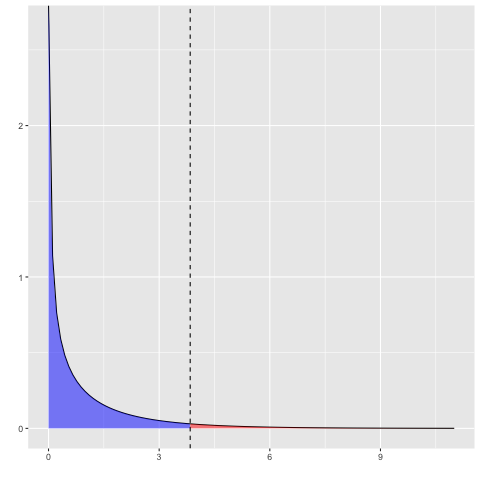

In [18]:
%%R
plot(result, type = "probs")

We can also use the probability calculator to determine the p.value associated with the calculated Chi-square value. Consistent with the output from the `.summary()` method shown above this `p.value` is `< .001`.

In [19]:
%%R
result <- radiant.basics::prob_chisq(df = 1, ub = 187.83)
summary(result)

Probability calculator
Distribution: Chi-squared
Df          : 1 
Mean        : 1 
Variance    : 2 
Lower bound : 0 
Upper bound : 187.83 

P(X < 187.83) = 1
P(X > 187.83) = 0


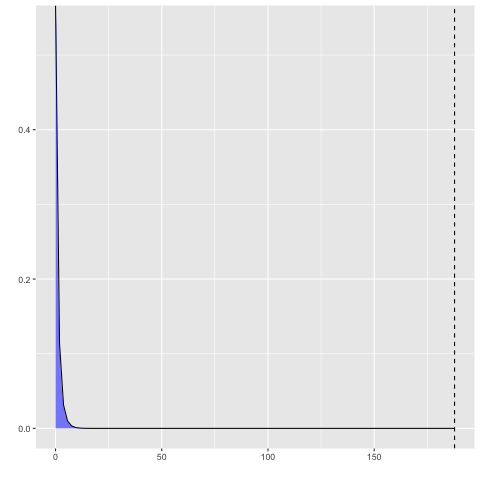

In [20]:
%%R
plot(result)

In addition to the numerical output provided by the `.summary()` method we can evaluate the hypothesis visually using the `.plot()` method of the `cross_tab` object. In addition to the distribution of observed and expected frequencies, we will also plot the standardized deviations (i.e., standardized differences between the observed and expected table). This measure is calculated as $(o-e)/sqrt(e)$, i.e., a score of how different the observed and expected frequencies in one cell in our table are. When a cell's standardized deviation is greater than 1.96 (in absolute value) the cell has a significant deviation from the model of independence (or no association).

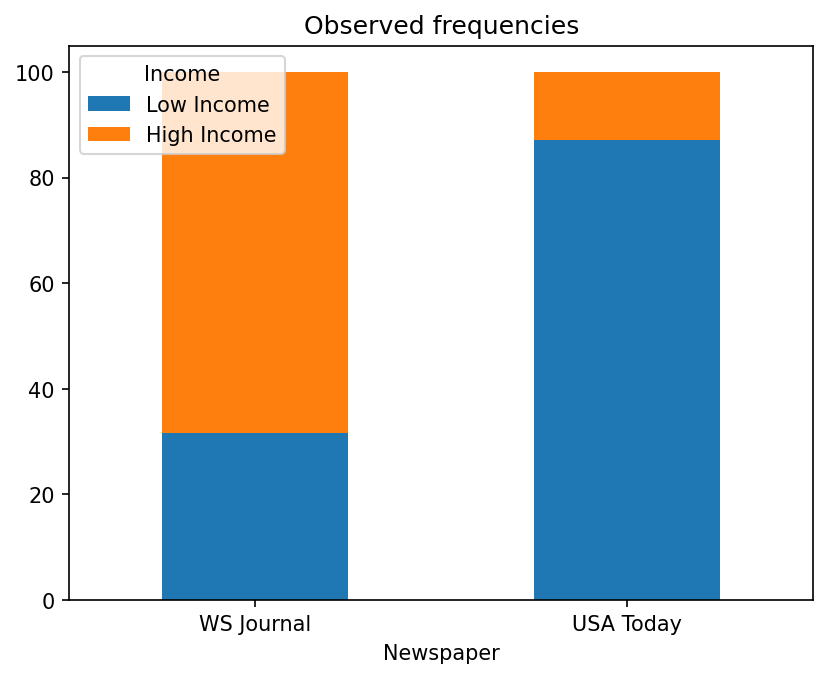

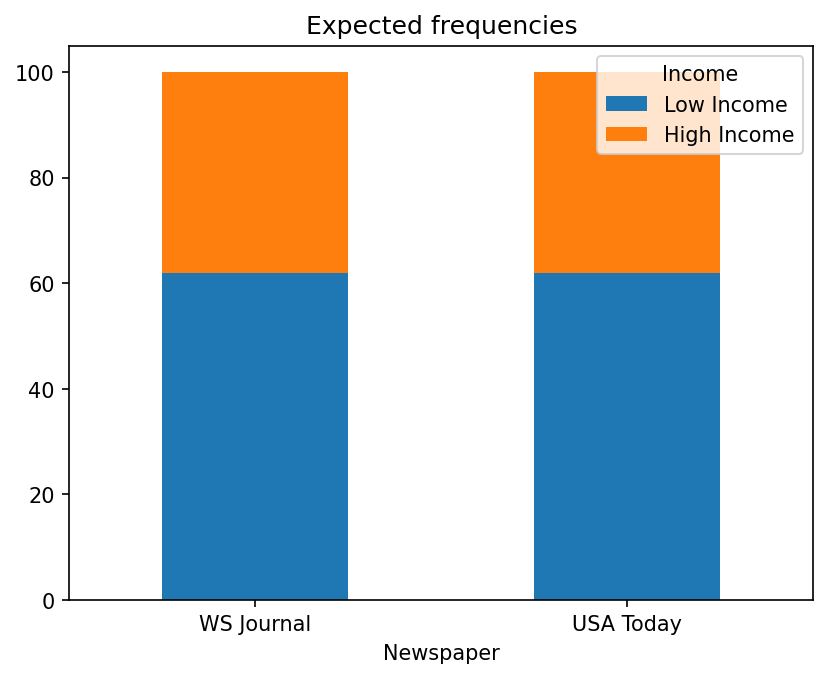

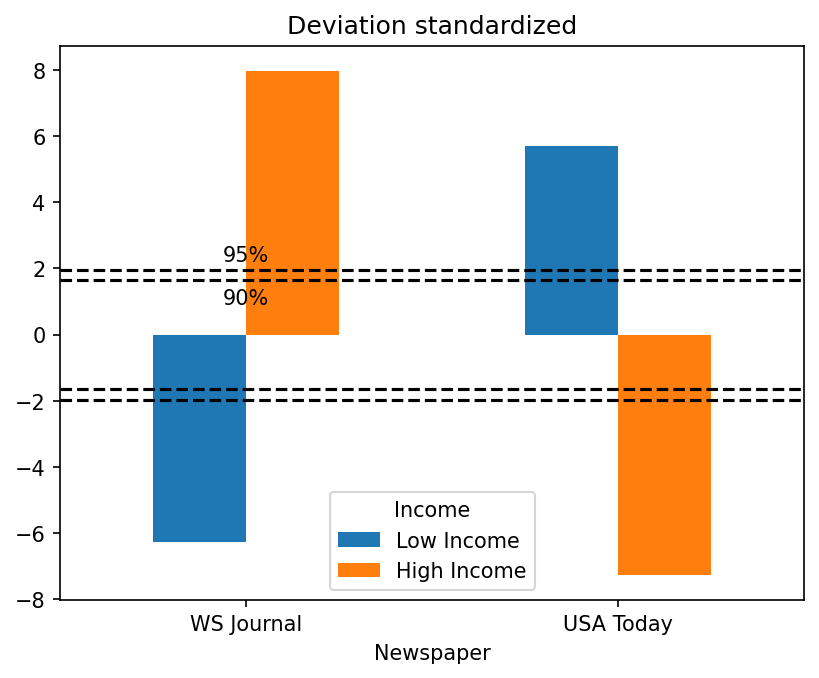

In [21]:
ct.plot(output=["observed", "expected", "dev_std"])

In the last plot above we see that all cells contribute to the association between income and readership as all standardized deviations are larger than 1.96 in absolute value (i.e., the bars extend beyond the outer dotted line in the plot).

In other words, there seem to be fewer low income respondents that read WSJ and more high income respondents that read WSJ than would be expected if the null hypothesis of no-association were true. Furthermore, there are more low income respondents that read USA today and fewer high income respondents that read USA Today than would be expected if the null hypothesis of no-association were true.

### Technical note

When one or more expected values are small (e.g., 5 or less) the p.value for the Chi-squared test is biased and it may be necessary to _collapse_ rows and/or columns and recalculate the test statistics.